## Exercise 2

### Subtask a)
- if you set the perplexity to 30, you have the same number of points which results in a uniform distribution that does not yield good results. This does not happen when perplexity < n, which explains the much better resutls
- t-SNE cares more about close neighbors than more distant data points. At the edges and corners you have more neighbors which pushes these points closer together
- a neighborhood of only two points is not enough to hold a square structure together
- perplexity has to be bigger than three. You have to look at enough neighbors around a point to bridge the gaps between the different circle elements. This does only happen if also look at points outside the local cluster.

### Subtask b)

In [80]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

In [77]:
df = pd.read_excel('Data_Cortex_Nuclear.xls')
df = df.interpolate(limit_direction ='backward') 
sc_1 = df.loc[df.loc[:,"class"] == "t-CS-s", :]
sc_2 = df.loc[df.loc[:,"class"] == "c-CS-s", :]
df = pd.concat([sc_1, sc_2])
df_num = df.select_dtypes(['number'])
df_num.head()

print('Data len: ', len(df_num))

Data len:  240


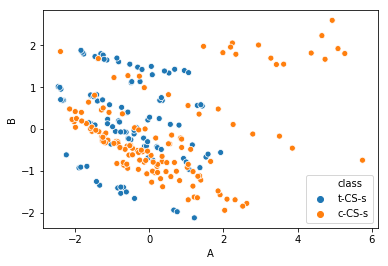

In [78]:
#PCA
pca = PCA(n_components=2)
df_red = pd.DataFrame(
    data=pca.fit_transform(df_num),
    columns=['A', 'B'],
    index=df_num.index
)
df_red['class'] = df['class']
sns.scatterplot(data=df_red, x='A', y='B', hue='class')

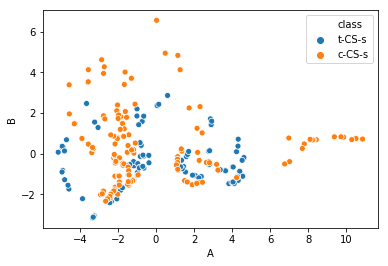

In [79]:
#isomap
iso = Isomap(10)
df_red = pd.DataFrame(
    data=iso.fit_transform(df_num),
    columns=['A', 'B'],
    index=df_num.index
)
df_red['class'] = df['class']
sns.scatterplot(data=df_red, x='A', y='B', hue='class')

I would choose the isomap visualization because it strechtes the data better along the x-axis which makes it more readable. Also it is easier to spot certain clusters.

### Subtask c)

Generating plot with params:  5 random
Generating plot with params:  10 random
Generating plot with params:  20 random
Generating plot with params:  30 random
Generating plot with params:  40 random
Generating plot with params:  5 pca
Generating plot with params:  10 pca
Generating plot with params:  20 pca
Generating plot with params:  30 pca
Generating plot with params:  40 pca


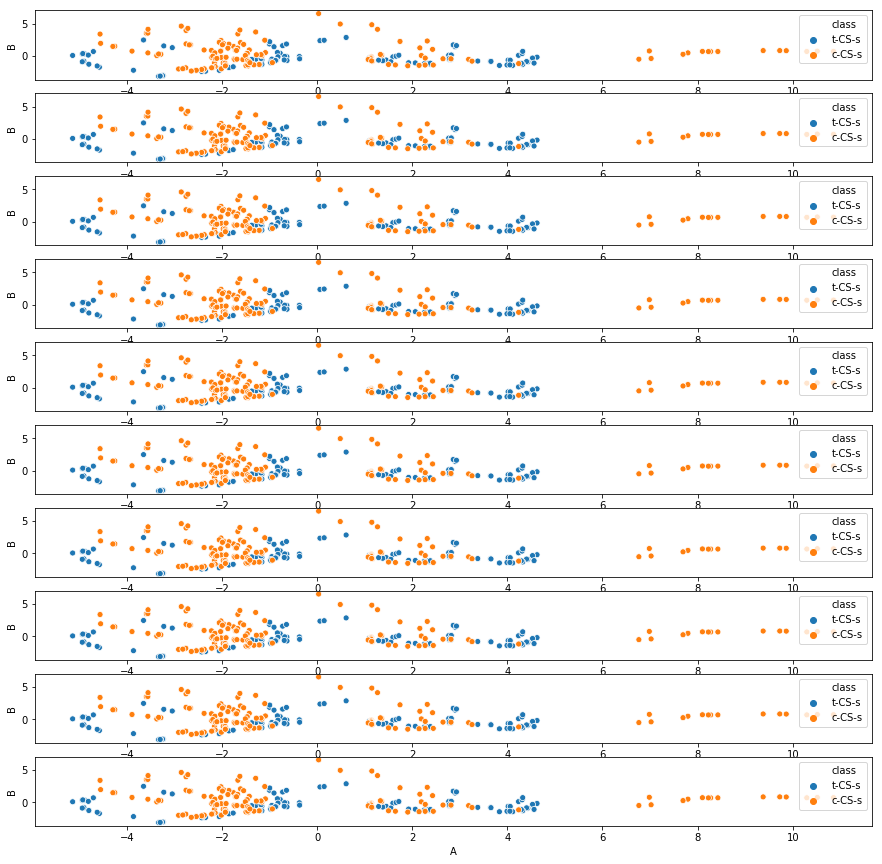

In [105]:
data = pd.read_excel('breast-cancer-wisconsin.xlsx')
data = data.drop('code', axis=1)
data = data.interpolate(limit_direction ='backward')
data_num = data.select_dtypes(['number'])
data_label = data['class']

inits = ['random', 'pca']
perplexity_params = [5, 10, 20, 30, 40]

fig, axs = plt.subplots(nrows=10, figsize=(15,150))
count = 0
for ini in inits:
    for perp in perplexity_params:
        print('Generating plot with params: ', perp, ini)
        tsne = TSNE(perplexity=perp, init=ini)
        data_red = pd.DataFrame(
            data=tsne.fit_transform(data_num),
            columns=['A', 'B'],
            index=data_num.index
        )
        data_red['class'] = data['class']
        sns.scatterplot(data=df_red, x='A', y='B', hue='class', ax=axs[count])
        count += 1

Simon Müller s6simue@uni-bonn.de

Mohamed Aborageh
mohamed.salah1@aiesec.net

## Exercise 3

##### a)

- First, given the two points xi & xj the probability Pij is computed to model the similarity between both points in high dimensional space. 

- Second, a Student's t-Distribution with one degree of freedom is used to compute joint-probability distribution in lower dimension Q, where data positions should be optimized.

- Last, gradient of Kullback-Leibler divergence between P and Q is used to minimize cost function C.


A-tSNE introduces the approximations at initialization stage, by using approximated KNN computations to build the approximated high dimensional joint-probability distribution pA instead of exact distribution P. The cost function C is minimized to obtain the approximated embedding described by QA.
The similarity between points is calculated with approximated neighbours NA, instead of exact neighborhood Ni.

##### b)

The idea of Progressive Visual Analysis is to provide intermediate results with which the user can start the analysis process, in case the computation of the final results is costly.

Given that the distances in high-dimensional space need to be precomputed to start minimization process, the initialization process could take time before the first intermediate result is generated, and any adjustment to data will force the user to wait for reinitialization.

A-tSNE approximates the distances using KNN queries instead of precomputing them. This allows the computation of iterative minimization to start instantly and immediate processing of data.

##### c)

As the data acquisition process could be imperfect, and the data could be incomplete or noisy and therefore data pre-processing is required.